In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
rent=pd.read_csv('../data/rent1202.csv')
rent.head()

,date,month,day,time,PM10,PM25,강수량(mm),기온(°C),대여수,강수여부,계절
0,2023-05-01,5,0,0,67.0,30.0,0.0,12.1,1,0,4
1,2023-05-01,5,0,1,66.0,26.0,0.0,11.6,3,0,4
2,2023-05-01,5,0,6,51.0,22.0,0.0,9.9,1,0,4
3,2023-05-01,5,0,7,49.0,21.0,0.0,10.1,9,0,4
4,2023-05-01,5,0,8,50.0,27.0,0.0,11.2,4,0,4


In [4]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7072 non-null   object 
 1   month    7072 non-null   int64  
 2   day      7072 non-null   int64  
 3   time     7072 non-null   int64  
 4   PM10     7072 non-null   float64
 5   PM25     7072 non-null   float64
 6   강수량(mm)  7072 non-null   float64
 7   기온(°C)   7072 non-null   float64
 8   대여수      7072 non-null   int64  
 9   강수여부     7072 non-null   int64  
 10  계절       7072 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 607.9+ KB


In [5]:
rent['date']=pd.to_datetime(rent['date'])
rent['year']=rent['date'].dt.year
rent.head()

,date,month,day,time,PM10,PM25,강수량(mm),기온(°C),대여수,강수여부,계절,year
0,2023-05-01,5,0,0,67.0,30.0,0.0,12.1,1,0,4,2023
1,2023-05-01,5,0,1,66.0,26.0,0.0,11.6,3,0,4,2023
2,2023-05-01,5,0,6,51.0,22.0,0.0,9.9,1,0,4,2023
3,2023-05-01,5,0,7,49.0,21.0,0.0,10.1,9,0,4,2023
4,2023-05-01,5,0,8,50.0,27.0,0.0,11.2,4,0,4,2023


In [6]:
rent=rent.loc[~((rent['year']==2023) & (rent['month']==5))]
rent.head()

,date,month,day,time,PM10,PM25,강수량(mm),기온(°C),대여수,강수여부,계절,year
569,2023-06-01,6,0,0,40.0,20.0,0.0,20.7,1,0,1,2023
570,2023-06-01,6,0,6,40.0,29.0,0.0,19.7,5,0,1,2023
571,2023-06-01,6,0,7,44.0,27.0,0.0,19.8,14,0,1,2023
572,2023-06-01,6,0,8,47.0,36.0,0.0,20.7,7,0,1,2023
573,2023-06-01,6,0,9,46.0,29.0,0.0,22.1,6,0,1,2023


In [7]:
merge_return=pd.read_csv('../data/merge_return.csv')
merge_return.head()

,자전거번호,대여일시,대여 대여소명,반납일시,반납대여소명,이용시간(분),자치구,반납 자치구,date,time,...,return_time,기온(°C),강수량(mm),시간,PM10,PM25,대여소명,lat,lng,month
0,SPB-65842,2024-04-01 00:54:33,몽촌토성역 3번 출구,2024-04-01 01:04:07,아산병원 기숙사 부근,9,송파구,송파구,2024-04-01,0,...,1,9.5,0.0,0,54.0,13.0,몽촌토성역 3번 출구,37.517078,127.112328,4
1,SPB-58807,2024-04-01 01:26:56,성내어울터,2024-04-01 01:44:30,아산병원 기숙사 부근,17,강동구,송파구,2024-04-01,1,...,1,8.6,0.0,1,54.0,15.0,성내어울터,37.536556,127.125534,4
2,SPB-46317,2024-04-01 01:48:21,풍납사거리 성내유수지,2024-04-01 01:53:35,아산병원 기숙사 부근,5,송파구,송파구,2024-04-01,1,...,1,8.6,0.0,1,54.0,15.0,풍납사거리 성내유수지,37.527653,127.119301,4
3,SPB-62606,2024-04-01 01:55:41,둔촌고교입구 교차로(길동주민센터 방면),2024-04-01 02:13:49,아산병원 기숙사 부근,18,강동구,송파구,2024-04-01,1,...,2,8.6,0.0,1,54.0,15.0,둔촌고교입구 교차로(길동주민센터 방면),37.535446,127.145187,4
4,SPB-43896,2024-04-01 04:00:04,구의역 리버비스타 오피스텔,2024-04-01 04:31:42,아산병원 기숙사 부근,31,광진구,송파구,2024-04-01,4,...,4,6.7,0.0,4,57.0,18.0,구의역 리버비스타 오피스텔,37.538097,127.089020,4


In [8]:
merge_return['date']=pd.to_datetime(merge_return['date'])
merge_return['year']=merge_return['date'].dt.year

In [9]:
merge_return=merge_return.loc[~((merge_return['year']==2023) & (merge_return['month']==5))]

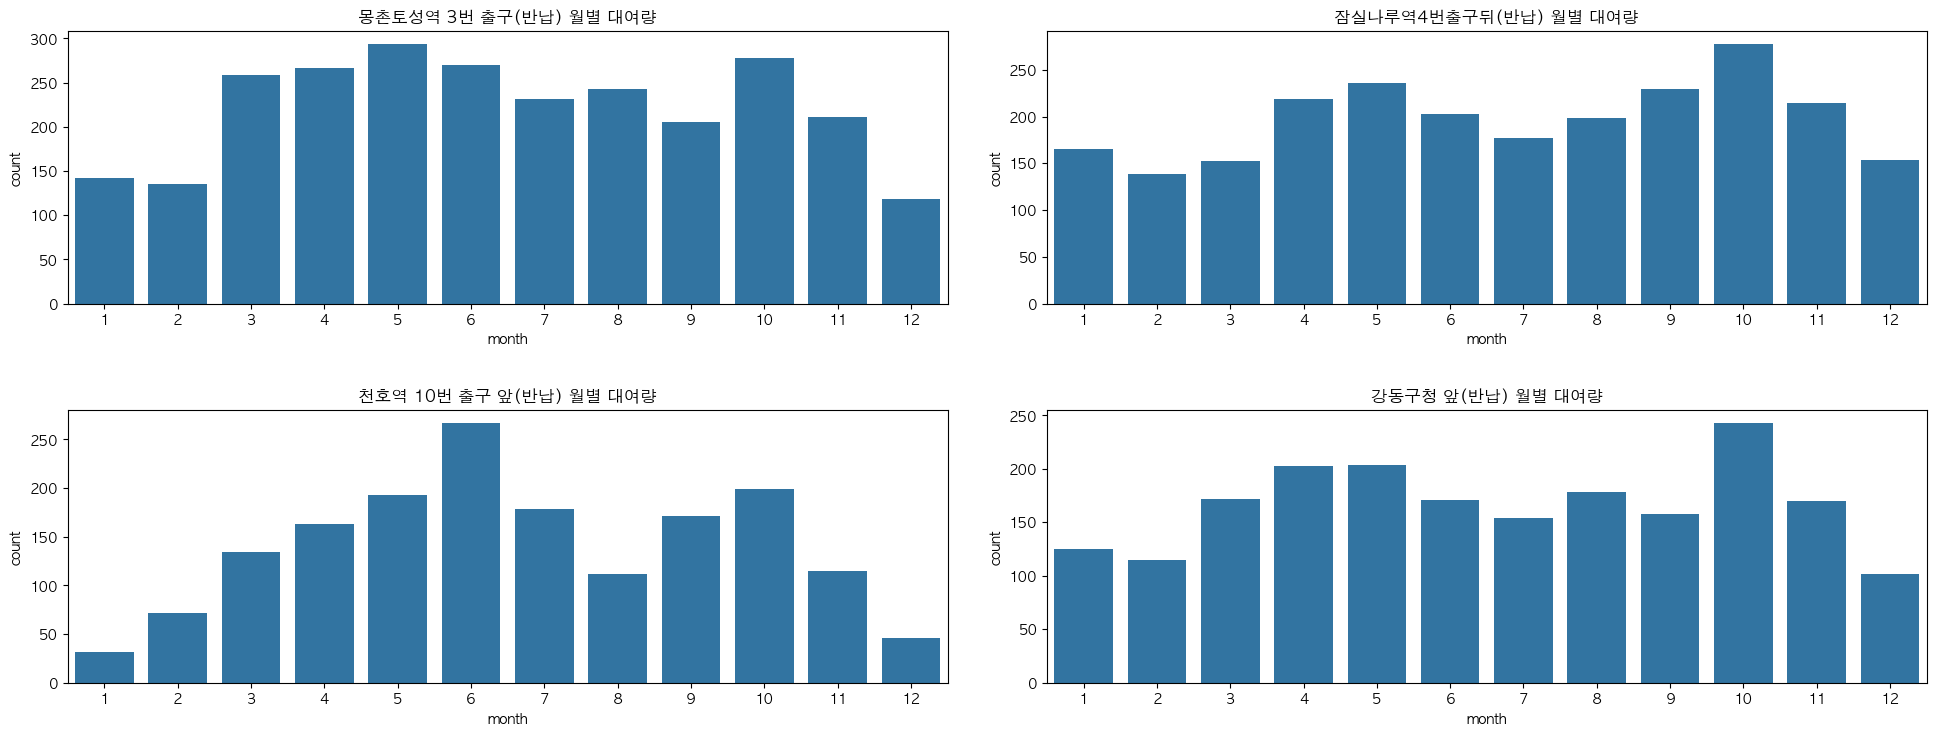

In [10]:
fig=plt.figure(figsize=(20,8))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
mongchon = merge_return[merge_return['대여소명'] == '몽촌토성역 3번 출구']
jamsil = merge_return[merge_return['대여소명'] == '잠실나루역4번출구뒤']
cheonho = merge_return[merge_return['대여소명'] == '천호역 10번 출구 앞']
gangdong = merge_return[merge_return['대여소명'] == '강동구청 앞']
sns.countplot(
    x='month',
    data=mongchon,
    ax=ax1
)
sns.countplot(
    x='month',
    data=jamsil,
    ax=ax2
)
sns.countplot(
    x='month',
    data=cheonho,
    ax=ax3
)
sns.countplot(
    x='month',
    data=gangdong,
    ax=ax4
)
ax1.set_title('몽촌토성역 3번 출구(반납) 월별 대여량')
ax2.set_title('잠실나루역4번출구뒤(반납) 월별 대여량')
ax3.set_title('천호역 10번 출구 앞(반납) 월별 대여량')
ax4.set_title('강동구청 앞(반납) 월별 대여량')
plt.tight_layout(pad=3.0) 
plt.show()

In [11]:
merge_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59823 entries, 0 to 66557
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   자전거번호        59823 non-null  object        
 1   대여일시         59823 non-null  object        
 2   대여 대여소명      59823 non-null  object        
 3   반납일시         59823 non-null  object        
 4   반납대여소명       59823 non-null  object        
 5   이용시간(분)      59823 non-null  int64         
 6   자치구          59823 non-null  object        
 7   반납 자치구       59823 non-null  object        
 8   date         59823 non-null  datetime64[ns]
 9   time         59823 non-null  int64         
 10  day          59823 non-null  int64         
 11  return_date  59823 non-null  object        
 12  return_time  59823 non-null  int64         
 13  기온(°C)       59823 non-null  float64       
 14  강수량(mm)      59823 non-null  float64       
 15  시간           59823 non-null  int64         
 16  PM10     

In [12]:
group_return=merge_return.drop(
                        ['자전거번호','대여 대여소명','반납대여소명','이용시간(분)','자치구','반납 자치구','date','time','시간'],
                        axis=1,
                        )
group_return.head()

,대여일시,반납일시,day,return_date,return_time,기온(°C),강수량(mm),PM10,PM25,대여소명,lat,lng,month,year
0,2024-04-01 00:54:33,2024-04-01 01:04:07,0,2024-04-01,1,9.5,0.0,54.0,13.0,몽촌토성역 3번 출구,37.517078,127.112328,4,2024
1,2024-04-01 01:26:56,2024-04-01 01:44:30,0,2024-04-01,1,8.6,0.0,54.0,15.0,성내어울터,37.536556,127.125534,4,2024
2,2024-04-01 01:48:21,2024-04-01 01:53:35,0,2024-04-01,1,8.6,0.0,54.0,15.0,풍납사거리 성내유수지,37.527653,127.119301,4,2024
3,2024-04-01 01:55:41,2024-04-01 02:13:49,0,2024-04-01,2,8.6,0.0,54.0,15.0,둔촌고교입구 교차로(길동주민센터 방면),37.535446,127.145187,4,2024
4,2024-04-01 04:00:04,2024-04-01 04:31:42,0,2024-04-01,4,6.7,0.0,57.0,18.0,구의역 리버비스타 오피스텔,37.538097,127.089020,4,2024


In [13]:
group_return=group_return.drop(
                        ['대여일시','반납일시'],
                        axis=1,
                        )

In [14]:
# pivot_table을 사용한 시간대별 집계
grouped_return = pd.pivot_table(group_return,
    index=['return_date', 'month', 'day', 'return_time'],  # 그룹화할 기준
    aggfunc={
        '대여소명': 'count',
        '기온(°C)': 'mean',
        'PM10': 'mean',
        'PM25': 'mean',
        '강수량(mm)': 'mean'
    }
).reset_index()

In [15]:
grouped_return.rename(columns={'대여소명':'반납수'},inplace=True)

In [16]:
grouped_return.head(10)

,return_date,month,day,return_time,PM10,PM25,강수량(mm),기온(°C),반납수
0,2023-06-01,6,0,0,40.000000,20.000000,0.0,20.700000,1
1,2023-06-01,6,0,2,40.000000,27.000000,0.0,20.400000,2
2,2023-06-01,6,0,3,40.000000,27.000000,0.0,20.400000,1
3,2023-06-01,6,0,4,39.000000,24.000000,0.0,20.100000,2
4,2023-06-01,6,0,5,39.000000,23.666667,0.0,19.933333,18
5,2023-06-01,6,0,6,39.812500,28.062500,0.0,19.737500,16
6,2023-06-01,6,0,7,43.345455,27.327273,0.0,19.783636,55
7,2023-06-01,6,0,8,46.076923,33.230769,0.0,20.423077,52
8,2023-06-01,6,0,9,46.100000,29.700000,0.0,21.960000,20
9,2023-06-01,6,0,10,51.000000,23.000000,0.0,23.100000,8


In [17]:
rent.drop('year', axis=1, inplace=True)

In [18]:
rent.reset_index(inplace=True)

In [19]:
rent.drop('index',axis=1,inplace=True)
rent.head(10)

,date,month,day,time,PM10,PM25,강수량(mm),기온(°C),대여수,강수여부,계절
0,2023-06-01,6,0,0,40.0,20.0,0.0,20.7,1,0,1
1,2023-06-01,6,0,6,40.0,29.0,0.0,19.7,5,0,1
2,2023-06-01,6,0,7,44.0,27.0,0.0,19.8,14,0,1
3,2023-06-01,6,0,8,47.0,36.0,0.0,20.7,7,0,1
4,2023-06-01,6,0,9,46.0,29.0,0.0,22.1,6,0,1
5,2023-06-01,6,0,10,51.0,23.0,0.0,23.1,12,0,1
6,2023-06-01,6,0,11,49.0,32.0,0.0,23.6,10,0,1
7,2023-06-01,6,0,12,47.0,28.0,0.0,25.3,8,0,1
8,2023-06-01,6,0,13,48.0,30.0,0.0,24.9,13,0,1
9,2023-06-01,6,0,14,47.0,33.0,0.0,25.2,8,0,1


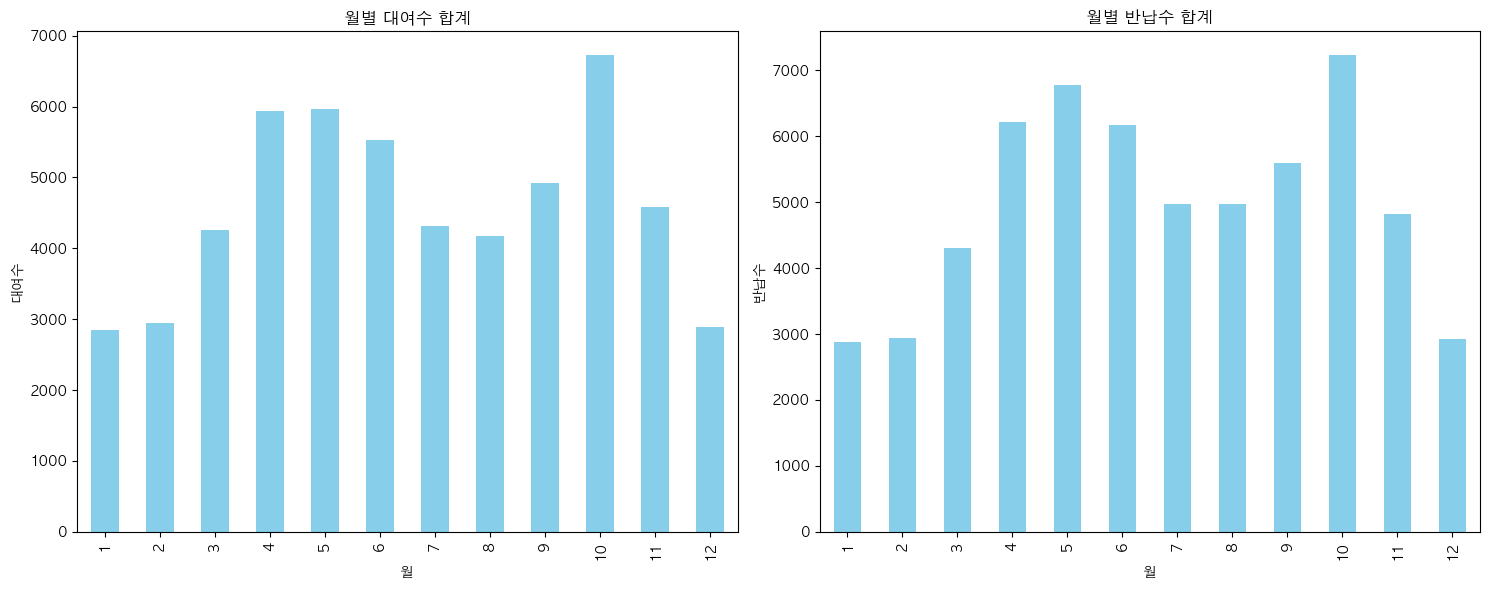

In [20]:
# 그래프를 그리기 위한 figure 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 월별 집계 데이터 생성
monthly_rentals = rent.groupby('month')['대여수'].sum()
monthly_returns = grouped_return.groupby('month')['반납수'].sum()

# 각 서브플롯에 데이터 시각화
monthly_rentals.plot(kind='bar', color='skyblue', ax=ax1)
monthly_returns.plot(kind='bar', color='skyblue', ax=ax2)

# 제목 설정
ax1.set_title('월별 대여수 합계')
ax2.set_title('월별 반납수 합계')

# x축, y축 레이블 설정
ax1.set_xlabel('월')
ax1.set_ylabel('대여수')
ax2.set_xlabel('월')
ax2.set_ylabel('반납수')

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [21]:
asan_list=[grouped_return, rent]
for data in asan_list:
    data['강수여부']=data['강수량(mm)'].map(lambda x: 0 if x==0 else 1 if 0<x<=5 else 2 if 5<x<15 else 3)
    data['계절']=data['month'].map(lambda x: 0 if (3<x<7 or x==10) else 1)

In [22]:
grouped_return.head()

,return_date,month,day,return_time,PM10,PM25,강수량(mm),기온(°C),반납수,강수여부,계절
0,2023-06-01,6,0,0,40.0,20.000000,0.0,20.700000,1,0,0
1,2023-06-01,6,0,2,40.0,27.000000,0.0,20.400000,2,0,0
2,2023-06-01,6,0,3,40.0,27.000000,0.0,20.400000,1,0,0
3,2023-06-01,6,0,4,39.0,24.000000,0.0,20.100000,2,0,0
4,2023-06-01,6,0,5,39.0,23.666667,0.0,19.933333,18,0,0


In [23]:
rent.head()

,date,month,day,time,PM10,PM25,강수량(mm),기온(°C),대여수,강수여부,계절
0,2023-06-01,6,0,0,40.0,20.0,0.0,20.7,1,0,0
1,2023-06-01,6,0,6,40.0,29.0,0.0,19.7,5,0,0
2,2023-06-01,6,0,7,44.0,27.0,0.0,19.8,14,0,0
3,2023-06-01,6,0,8,47.0,36.0,0.0,20.7,7,0,0
4,2023-06-01,6,0,9,46.0,29.0,0.0,22.1,6,0,0


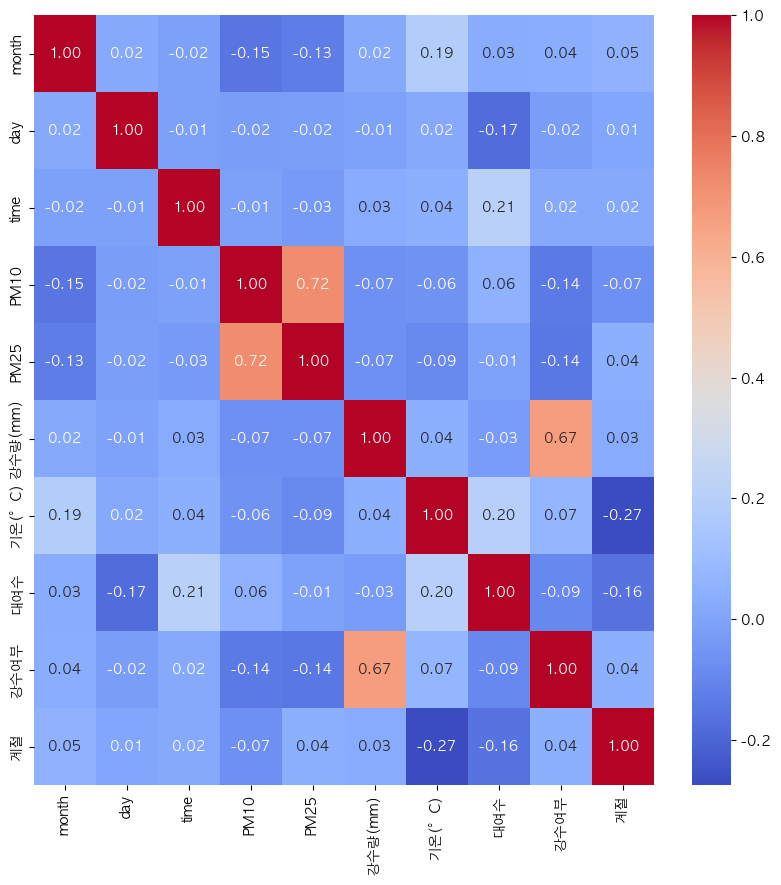

In [24]:
# 숫자형 데이터만 선택
numeric_df = rent.select_dtypes(include=['number'])

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

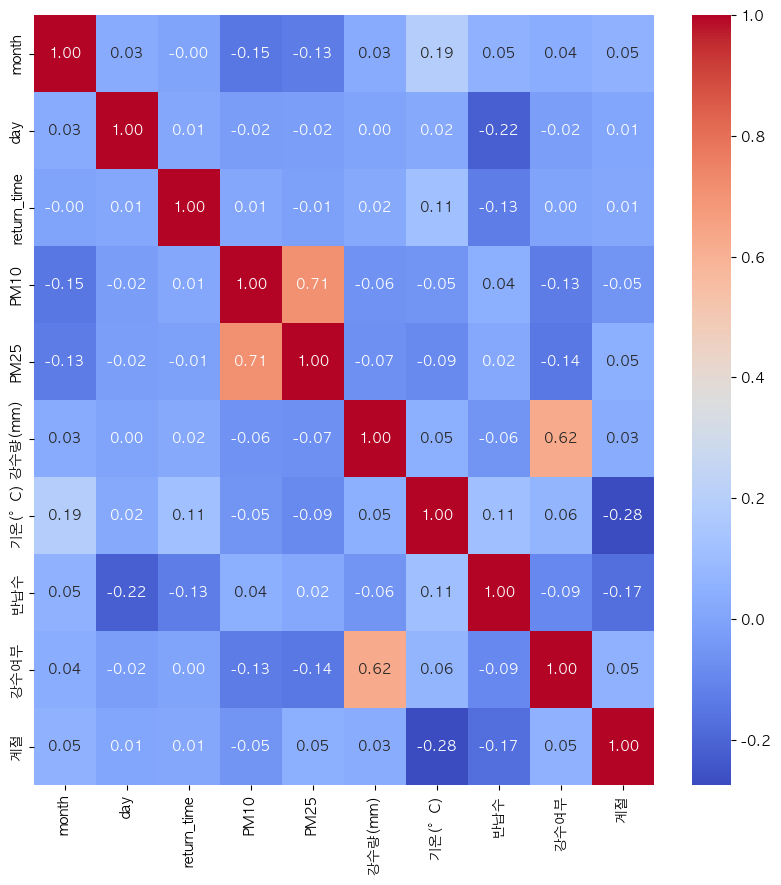

In [25]:
# 숫자형 데이터만 선택
numeric_df = grouped_return.select_dtypes(include=['number'])

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [27]:
# rent_x=rent[['계절','month','day','time','기온(°C)','PM10','PM25','강수량(mm)','강수여부']]
rent_x=rent[['계절','month','day','time','기온(°C)','PM10','PM25','강수량(mm)']]
rent_y=rent['대여수']
# return_x=grouped_return[['계절','month','day','return_time','기온(°C)','PM10','PM25','강수량(mm)','강수여부']]
return_x=grouped_return[['계절','month','day','return_time','기온(°C)','PM10','PM25','강수량(mm)']]
return_y=grouped_return['반납수']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    rent_x, 
    rent_y, 
    test_size=0.2, 
    random_state=42
)
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(
    return_x, 
    return_y, 
    test_size=0.2, 
    random_state=42
)

In [29]:
# 모델 학습
rf = RandomForestRegressor(random_state=42,n_estimators=100,max_depth=7,min_samples_split=5)
rf.fit(X_train, y_train)
rf_re = RandomForestRegressor(random_state=42,n_estimators=100,max_depth=7,min_samples_split=5)
rf_re.fit(X_re_train, y_re_train)

RandomForestRegressor(max_depth=7, min_samples_split=5, random_state=42)

In [30]:
print('rent')
# 예측
predicted_usage = rf.predict(X_test)

# 훈련 및 테스트 점수 출력
train_score_usage = rf.score(X_train, y_train)
test_score_usage = rf.score(X_test, y_test)

print(f"훈련 점수: {train_score_usage:.2f}")
print(f"테스트 점수: {test_score_usage:.2f}")
print()
print('return')
# 예측
predicted_re_usage = rf_re.predict(X_re_test)

# 훈련 및 테스트 점수 출력
train_re_score_usage = rf_re.score(X_re_train, y_re_train)
test_re_score_usage = rf_re.score(X_re_test, y_re_test)

print(f"훈련 점수: {train_re_score_usage:.2f}")
print(f"테스트 점수: {test_re_score_usage:.2f}")

rent
훈련 점수: 0.78
테스트 점수: 0.71

return
훈련 점수: 0.81
테스트 점수: 0.78


In [31]:
print('rent')
# 2. 학습 데이터에 대해 교차검증 수행
scores = cross_validate(
    rf, 
    X_train, 
    y_train,
    cv=5,  # 교차검증 폴드 수 지정
    scoring='r2',  # 평가 지표 지정
    return_train_score=True  # 훈련 점수도 반환
)

# 3. 교차검증 결과 확인
print(f"교차검증 평균 점수: {np.mean(scores['test_score']):.3f}")
print(f"교차검증 표준편차: {np.std(scores['test_score']):.3f}")
print()
print('return')
re_scores = cross_validate(
    rf_re, 
    X_re_train, 
    y_re_train,
    cv=5,  # 교차검증 폴드 수 지정
    scoring='r2',  # 평가 지표 지정
    return_train_score=True  # 훈련 점수도 반환
)

# 3. 교차검증 결과 확인
print(f"교차검증 평균 점수: {np.mean(re_scores['test_score']):.3f}")
print(f"교차검증 표준편차: {np.std(re_scores['test_score']):.3f}")

rent
교차검증 평균 점수: 0.736
교차검증 표준편차: 0.020

return
교차검증 평균 점수: 0.776
교차검증 표준편차: 0.035


In [32]:
from sklearn.metrics import mean_squared_error

# MSE 계산
mse = mean_squared_error(y_test, predicted_usage)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, predicted_usage))

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MSE: 27.93
RMSE: 5.28


In [33]:
rent.to_csv('../data/rent1203.csv',index=False)
grouped_return.to_csv('../data/return1203.csv',index=False)

In [34]:
from sklearn.tree import DecisionTreeRegressor 
dt=DecisionTreeRegressor(max_depth=8,min_samples_split=5,min_samples_leaf=5,random_state=42)

In [35]:
from io import StringIO

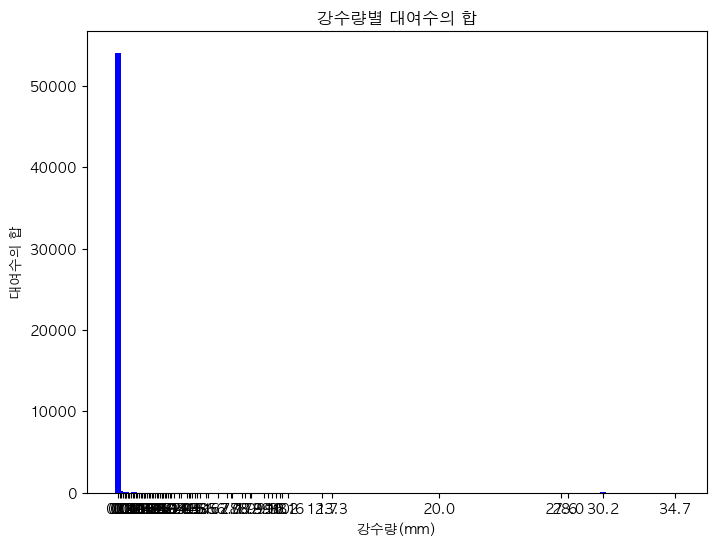

In [36]:
sum_by_precipitation = rent.groupby('강수량(mm)')['대여수'].sum().reset_index()

# 히스토그램 생성
plt.figure(figsize=(8, 6))
plt.bar(sum_by_precipitation['강수량(mm)'], sum_by_precipitation['대여수'], color='blue', width=0.4)
plt.xlabel('강수량(mm)')
plt.ylabel('대여수의 합')
plt.title('강수량별 대여수의 합')
plt.xticks(sum_by_precipitation['강수량(mm)'])
plt.show()

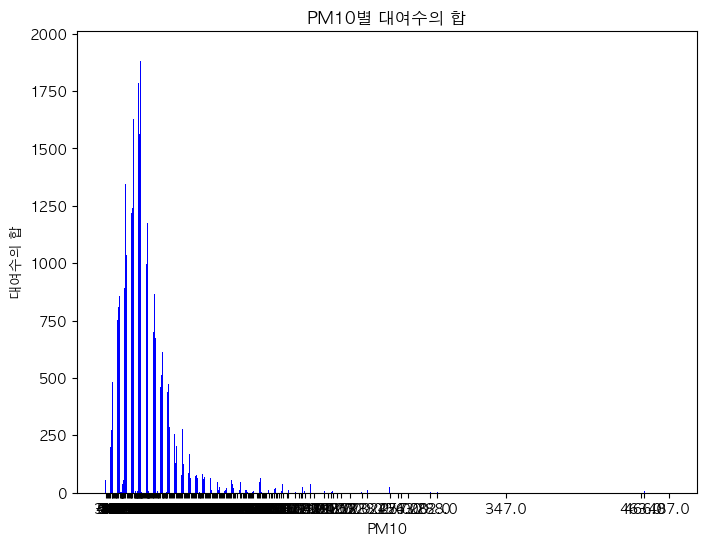

In [37]:
sum_by_precipitation = rent.groupby('PM10')['대여수'].sum().reset_index()

# 히스토그램 생성
plt.figure(figsize=(8, 6))
plt.bar(sum_by_precipitation['PM10'], sum_by_precipitation['대여수'], color='blue', width=0.4)
plt.xlabel('PM10')
plt.ylabel('대여수의 합')
plt.title('PM10별 대여수의 합')
plt.xticks(sum_by_precipitation['PM10'])
plt.show()

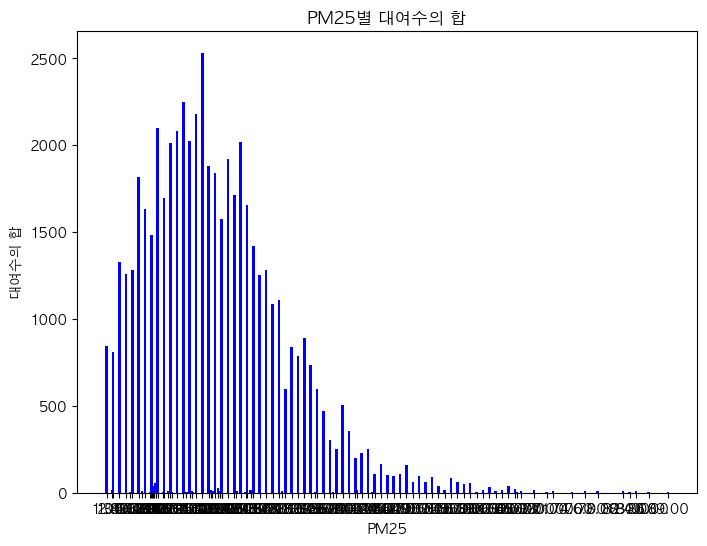

In [38]:
sum_by_precipitation = rent.groupby('PM25')['대여수'].sum().reset_index()

# 히스토그램 생성
plt.figure(figsize=(8, 6))
plt.bar(sum_by_precipitation['PM25'], sum_by_precipitation['대여수'], color='blue', width=0.4)
plt.xlabel('PM25')
plt.ylabel('대여수의 합')
plt.title('PM25별 대여수의 합')
plt.xticks(sum_by_precipitation['PM25'])
plt.show()

In [39]:
# 로그 변환 수행
# 0.1을 더하는 이유: 로그 변환 시 0값이 있을 경우를 대비
for data in asan_list:
    data['PM10'] = np.log(data['PM10'] + 0.1)
    data['PM25'] = np.log(data['PM25'] + 0.1)

In [40]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

In [41]:
for data in asan_list:
    data[['standard_PM10', 'standard_PM25']] = scaler.fit_transform(data[['PM10', 'PM25']])

In [42]:
rent.head()

,date,month,day,time,PM10,PM25,강수량(mm),기온(°C),대여수,강수여부,계절,standard_PM10,standard_PM25
0,2023-06-01,6,0,0,3.691376,3.000720,0.0,20.7,1,0,0,0.510221,0.418307
1,2023-06-01,6,0,6,3.691376,3.370738,0.0,19.7,5,0,0,0.510221,0.898293
2,2023-06-01,6,0,7,3.786460,3.299534,0.0,19.8,14,0,0,0.667002,0.805927
3,2023-06-01,6,0,8,3.852273,3.586293,0.0,20.7,7,0,0,0.775520,1.177910
4,2023-06-01,6,0,9,3.830813,3.370738,0.0,22.1,6,0,0,0.740135,0.898293


In [43]:
rent_x=rent[['계절','month','day','time','기온(°C)','standard_PM10','standard_PM25','강수량(mm)']]
rent_y=rent['대여수']
return_x=grouped_return[['계절','month','day','return_time','기온(°C)','standard_PM10','standard_PM25','강수량(mm)']]
return_y=grouped_return['반납수']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    rent_x, 
    rent_y, 
    test_size=0.2, 
    random_state=42
)
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(
    return_x, 
    return_y, 
    test_size=0.2, 
    random_state=42
)

In [45]:
# 모델 학습
rf = RandomForestRegressor(random_state=42,n_estimators=100,max_depth=7,min_samples_split=5)
rf.fit(X_train, y_train)
rf_re = RandomForestRegressor(random_state=42,n_estimators=100,max_depth=7,min_samples_split=5)
rf_re.fit(X_re_train, y_re_train)

RandomForestRegressor(max_depth=7, min_samples_split=5, random_state=42)

In [46]:
print('rent')
# 예측
predicted_usage = rf.predict(X_test)

# 훈련 및 테스트 점수 출력
train_score_usage = rf.score(X_train, y_train)
test_score_usage = rf.score(X_test, y_test)

print(f"훈련 점수: {train_score_usage:.2f}")
print(f"테스트 점수: {test_score_usage:.2f}")
print()
print('return')
# 예측
predicted_re_usage = rf_re.predict(X_re_test)

# 훈련 및 테스트 점수 출력
train_re_score_usage = rf_re.score(X_re_train, y_re_train)
test_re_score_usage = rf_re.score(X_re_test, y_re_test)

print(f"훈련 점수: {train_re_score_usage:.2f}")
print(f"테스트 점수: {test_re_score_usage:.2f}")

rent
훈련 점수: 0.78
테스트 점수: 0.70

return
훈련 점수: 0.81
테스트 점수: 0.78


In [47]:
print('rent')
# 2. 학습 데이터에 대해 교차검증 수행
scores = cross_validate(
    rf, 
    X_train, 
    y_train,
    cv=5,  # 교차검증 폴드 수 지정
    scoring='r2',  # 평가 지표 지정
    return_train_score=True  # 훈련 점수도 반환
)

# 3. 교차검증 결과 확인
print(f"교차검증 평균 점수: {np.mean(scores['test_score']):.3f}")
print(f"교차검증 표준편차: {np.std(scores['test_score']):.3f}")
print()
print('return')
re_scores = cross_validate(
    rf_re, 
    X_re_train, 
    y_re_train,
    cv=5,  # 교차검증 폴드 수 지정
    scoring='r2',  # 평가 지표 지정
    return_train_score=True  # 훈련 점수도 반환
)

# 3. 교차검증 결과 확인
print(f"교차검증 평균 점수: {np.mean(re_scores['test_score']):.3f}")
print(f"교차검증 표준편차: {np.std(re_scores['test_score']):.3f}")

rent
교차검증 평균 점수: 0.736
교차검증 표준편차: 0.020

return
교차검증 평균 점수: 0.776
교차검증 표준편차: 0.034


In [48]:
from sklearn.model_selection import GridSearchCV

# 탐색할 하이퍼파라미터 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 모델 생성
rf_model = RandomForestRegressor()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 교차 검증 폴드 수
    n_jobs=-1,  # 모든 가용 코어 사용
    verbose=2,  # 진행 상황 출력
    scoring='r2'  # 평가 지표
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_s

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [49]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [50]:
best_model=grid_search.best_estimator_

In [51]:
best_score = grid_search.best_score_
print("최고 R2 점수:", best_score)

최고 R2 점수: 0.7413475420564382


In [52]:
predictions = best_model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("MSE:", mse)
print("R2 점수:", r2)

print()
feature_importance = best_model.feature_importances_
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"{feature}: {importance}")

MSE: 27.615644939887144
R2 점수: 0.7084998646660738

계절: 0.04790977438648052
month: 0.012586711655008041
day: 0.1657147188841213
time: 0.5471762829262445
기온(°C): 0.11566365047487073
standard_PM10: 0.04125284197698568
standard_PM25: 0.02247516805107473
강수량(mm): 0.04722085164521431


In [54]:
# # 모델 학습
# rf = RandomForestRegressor(random_state=42,n_estimators=300,max_depth=10,min_samples_split=10,min_samples_leaf=1)
# rf.fit(X_train, y_train)
# rf_re = RandomForestRegressor(random_state=42,n_estimators=300,max_depth=10,min_samples_split=10,min_samples_leaf=1)
# rf_re.fit(X_re_train, y_re_train)

# print('rent')
# # 예측
# predicted_usage = rf.predict(X_test)

# # 훈련 및 테스트 점수 출력
# train_score_usage = rf.score(X_train, y_train)
# test_score_usage = rf.score(X_test, y_test)

# print(f"훈련 점수: {train_score_usage:.2f}")
# print(f"테스트 점수: {test_score_usage:.2f}")
# print()
# print('return')
# # 예측
# predicted_re_usage = rf_re.predict(X_re_test)

# # 훈련 및 테스트 점수 출력
# train_re_score_usage = rf_re.score(X_re_train, y_re_train)
# test_re_score_usage = rf_re.score(X_re_test, y_re_test)

# print(f"훈련 점수: {train_re_score_usage:.2f}")
# print(f"테스트 점수: {test_re_score_usage:.2f}")
# print('---')

# print('교차검증')
# print('rent')
# # 2. 학습 데이터에 대해 교차검증 수행
# scores = cross_validate(
#     rf, 
#     X_train, 
#     y_train,
#     cv=5,  # 교차검증 폴드 수 지정
#     scoring='r2',  # 평가 지표 지정
#     return_train_score=True  # 훈련 점수도 반환
# )

# # 3. 교차검증 결과 확인
# print(f"교차검증 평균 점수: {np.mean(scores['test_score']):.3f}")
# print(f"교차검증 표준편차: {np.std(scores['test_score']):.3f}")
# print()
# print('return')
# re_scores = cross_validate(
#     rf_re, 
#     X_re_train, 
#     y_re_train,
#     cv=5,  # 교차검증 폴드 수 지정
#     scoring='r2',  # 평가 지표 지정
#     return_train_score=True  # 훈련 점수도 반환
# )

# # 3. 교차검증 결과 확인
# print(f"교차검증 평균 점수: {np.mean(re_scores['test_score']):.3f}")
# print(f"교차검증 표준편차: {np.std(re_scores['test_score']):.3f}")

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# 모델 생성
gb = GradientBoostingRegressor()
re_gb = GradientBoostingRegressor()


In [56]:
grid_gb = GridSearchCV(gb, param_grid, cv=5, scoring='r2')
grid_gb.fit(X_train, y_train)
re_grid_gb = GridSearchCV(re_gb, param_grid, cv=5, scoring='r2')
re_grid_gb.fit(X_re_train, y_re_train)

KeyboardInterrupt: 

In [ ]:
gb.fit(X_train, y_train)
re_gb.fit(X_re_train, y_re_train)

print('rent')
# 예측
predicted_usage = gb.predict(X_test)

# 훈련 및 테스트 점수 출력
train_score_usage = gb.score(X_train, y_train)
test_score_usage = gb.score(X_test, y_test)

print(f"훈련 점수: {train_score_usage:.2f}")
print(f"테스트 점수: {test_score_usage:.2f}")
print()
print('return')

# 예측
predicted_re_usage = re_gb.predict(X_re_test)

# 훈련 및 테스트 점수 출력
train_re_score_usage = re_gb.score(X_re_train, y_re_train)
test_re_score_usage = re_gb.score(X_re_test, y_re_test)

print(f"훈련 점수: {train_re_score_usage:.2f}")
print(f"테스트 점수: {test_re_score_usage:.2f}")
print('---')

print('교차검증')
print('rent')
# 2. 학습 데이터에 대해 교차검증 수행
scores = cross_validate(
    gb, 
    X_train, 
    y_train,
    cv=5,  # 교차검증 폴드 수 지정
    scoring='r2',  # 평가 지표 지정
    return_train_score=True  # 훈련 점수도 반환
)

# 3. 교차검증 결과 확인
print(f"교차검증 평균 점수: {np.mean(scores['test_score']):.3f}")
print(f"교차검증 표준편차: {np.std(scores['test_score']):.3f}")
print()
print('return')
re_scores = cross_validate(
    re_gb, 
    X_re_train, 
    y_re_train,
    cv=5,  # 교차검증 폴드 수 지정
    scoring='r2',  # 평가 지표 지정
    return_train_score=True  # 훈련 점수도 반환
)

# 3. 교차검증 결과 확인
print(f"교차검증 평균 점수: {np.mean(re_scores['test_score']):.3f}")
print(f"교차검증 표준편차: {np.std(re_scores['test_score']):.3f}")

rent
훈련 점수: 0.74
테스트 점수: 0.68

return
훈련 점수: 0.78
테스트 점수: 0.75
---
교차검증
rent
교차검증 평균 점수: 0.706
교차검증 표준편차: 0.010

return
교차검증 평균 점수: 0.754
교차검증 표준편차: 0.012


In [ ]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt=DecisionTreeRegressor(random_state=42)
re_dt=DecisionTreeRegressor(random_state=42)

In [ ]:
grid_dt=GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)
re_grid_dt=GridSearchCV(
    re_dt,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)
grid_dt.fit(X_train, y_train)
re_grid_dt.fit(X_re_train, y_re_train)
best_dt=grid_dt.best_estimator_
re_best_dt=re_grid_dt.best_estimator_

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, max

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
138 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-p

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
187 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-p

In [ ]:
print('rent')
# 예측
predicted_usage = best_dt.predict(X_test)

# 훈련 및 테스트 점수 출력
train_score_usage = best_dt.score(X_train, y_train)
test_score_usage = best_dt.score(X_test, y_test)

print(f"훈련 점수: {train_score_usage:.2f}")
print(f"테스트 점수: {test_score_usage:.2f}")
print()
print('return')

# 예측
predicted_re_usage = re_best_dt.predict(X_re_test)

# 훈련 및 테스트 점수 출력
train_re_score_usage = re_best_dt.score(X_re_train, y_re_train)
test_re_score_usage = re_best_dt.score(X_re_test, y_re_test)

print(f"훈련 점수: {train_re_score_usage:.2f}")
print(f"테스트 점수: {test_re_score_usage:.2f}")

rent
훈련 점수: 0.74
테스트 점수: 0.62

return
훈련 점수: 0.85
테스트 점수: 0.55


In [ ]:
rent_x=rent[['계절','month','day','time','기온(°C)','강수량(mm)']]
# rent_x=rent[['계절','month','day','time']]
rent_y=rent['대여수']
return_x=grouped_return[['계절','month','day','return_time','기온(°C)','강수량(mm)']]
# return_x=grouped_return[['계절','month','day','return_time']]
return_y=grouped_return['반납수']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    rent_x, 
    rent_y, 
    test_size=0.2, 
    random_state=42
)
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(
    return_x, 
    return_y, 
    test_size=0.2, 
    random_state=42
)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 탐색할 하이퍼파라미터 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 모델 생성
rf = RandomForestRegressor()
re_rf = RandomForestRegressor()

# GridSearchCV 객체 생성
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 교차 검증 폴드 수
    n_jobs=-1,  # 모든 가용 코어 사용
    verbose=2,  # 진행 상황 출력
    scoring='r2'  # 평가 지표
)

# 그리드 서치 수행
rf_grid.fit(X_train, y_train)


# GridSearchCV 객체 생성
re_rf_grid = GridSearchCV(
    estimator=re_rf,
    param_grid=param_grid,
    cv=5,  # 교차 검증 폴드 수
    n_jobs=-1,  # 모든 가용 코어 사용
    verbose=2,  # 진행 상황 출력
    scoring='r2'  # 평가 지표
)

# 그리드 서치 수행
re_rf_grid.fit(X_re_train, y_re_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, min_s

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [ ]:
rf_best=rf_grid.best_estimator_
re_rf_best=re_rf_grid.best_estimator_

In [ ]:
print('rent')
# 예측
predicted_usage = rf_best.predict(X_test)

# 훈련 및 테스트 점수 출력
train_score_usage = rf_best.score(X_train, y_train)
test_score_usage = rf_best.score(X_test, y_test)

print(f"훈련 점수: {train_score_usage:.2f}")
print(f"테스트 점수: {test_score_usage:.2f}")
print()
print('return')

# 예측
predicted_re_usage = re_rf_best.predict(X_re_test)

# 훈련 및 테스트 점수 출력
train_re_score_usage = re_rf_best.score(X_re_train, y_re_train)
test_re_score_usage = re_rf_best.score(X_re_test, y_re_test)

print(f"훈련 점수: {train_re_score_usage:.2f}")
print(f"테스트 점수: {test_re_score_usage:.2f}")

rent
훈련 점수: 0.82
테스트 점수: 0.71

return
훈련 점수: 0.87
테스트 점수: 0.80


In [ ]:
import joblib

In [ ]:
from joblib import dump, load

# 모델 저장
dump(rf_best, 'rent_best.joblib')
dump(re_rf_best, 'return_best.joblib')

['return_best.joblib']

In [ ]:
rent_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6503 entries, 0 to 6502
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   계절       6503 non-null   int64  
 1   month    6503 non-null   int64  
 2   day      6503 non-null   int64  
 3   time     6503 non-null   int64  
 4   기온(°C)   6503 non-null   float64
 5   강수량(mm)  6503 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 305.0 KB


In [ ]:
return_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   계절           7256 non-null   int64  
 1   month        7256 non-null   int64  
 2   day          7256 non-null   int64  
 3   return_time  7256 non-null   int64  
 4   기온(°C)       7256 non-null   float64
 5   강수량(mm)      7256 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 340.3 KB
